<a href="https://colab.research.google.com/github/BrunaFerreira/ifood-case/blob/main/2_modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier


from sklearn.metrics import roc_auc_score
from sklearn import metrics
from sklearn.metrics import roc_auc_score, roc_curve, classification_report,\
                            accuracy_score, confusion_matrix, auc
from sklearn.metrics import f1_score

from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

from sklearn.model_selection import GridSearchCV

# 1. Leitura Dados Pre Processados

In [51]:
df = pd.read_csv('/content/drive/MyDrive/10_Trabalho/2_Cases_testes/202506_Ifood/ifood-case/data/processed/df_processed_complete.csv')
df = df.set_index(['account_id', 'offer_id_pk'])
df = df.drop(columns = ['index'])
df.head()

,,age,credit_card_limit,valor_total_gasto_transacoes,account_age,target,gender_F,gender_M,gender_O
account_id,offer_id_pk,,,,,,,,
78afa995795e4d85b5d9ceeca43f5fef,9b98b8c7a33c4b65b9aebfe6a799e6d9,0.57,0.833333,0.099006,0.242485,0,True,False,False
a03223e636434f42ac4c3df47e8bac43,0b1e1539f2cc45b7b9fa7c272da2e1d7,1.00,0.000000,0.002891,0.194389,0,False,False,True
e2127556f4f64592b11af22de27a7932,2906b810c7d4411798c6938adc9daaa5,0.50,0.583333,0.035886,0.050100,0,False,True,False
8ec6ce2a7e7949b1bf142def7d0e0586,fafdcd668e3743c1bb461111dcafc2a4,1.00,0.000000,0.000000,0.166333,0,False,False,True
68617ca6246f4fbc85e91a2a49552598,4d5c57ea9a6940dd891ad53e9dbe8da0,1.00,0.000000,0.000149,0.162325,0,False,False,True


In [52]:
df.shape

(92284, 8)

In [53]:
# Verificando o time de dado de cada variavel, numero de amostras e valores ausentes
df_ausentes = pd.DataFrame({
    'n_faltantes': df.isna().sum(),
    'percentual': df.isna().mean() * 100
}).sort_values('percentual', ascending=False)

print(df_ausentes)

                              n_faltantes  percentual
age                                     0         0.0
credit_card_limit                       0         0.0
valor_total_gasto_transacoes            0         0.0
account_age                             0         0.0
target                                  0         0.0
gender_F                                0         0.0
gender_M                                0         0.0
gender_O                                0         0.0


## Seleção de Variaveis

### Informação Mutua

In [54]:
# from sklearn.feature_selection import mutual_info_classif
#
# X = df.drop(columns='target')
# y = df['target']
#
# importances = mutual_info_classif(X, y)
# info_df = pd.DataFrame({'feature': X.columns, 'score': importances})
#
# # Visualizar variáveis menos informativas
# info_df = info_df.sort_values('score')
#
# # Excluir as que têm score baixo (por ex. == 0)
# variaveis_irrelevantes = info_df[info_df['score'] == 0]['feature'].tolist()
# df_reduzido = df.drop(columns=variaveis_irrelevantes)

In [55]:
#info_df

### Random Forest - Feature importances

In [56]:
# Conjunto X com as variaveis
X_colunas = df.columns
X_colunas = X_colunas.drop('target')
X = df[X_colunas]

In [57]:
# Variavel resposta
y = df['target']

In [58]:
clf = RandomForestClassifier(class_weight = 'balanced')
clf.fit(X, y)

feature_scores = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)

In [59]:
feature_scores

,0
valor_total_gasto_transacoes,0.483520
account_age,0.194256
age,0.155158
credit_card_limit,0.151290
gender_O,0.005685
gender_F,0.005154
gender_M,0.004937


/tmp/ipython-input-60-1401109933.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(feature_scores.index, fontsize=20)


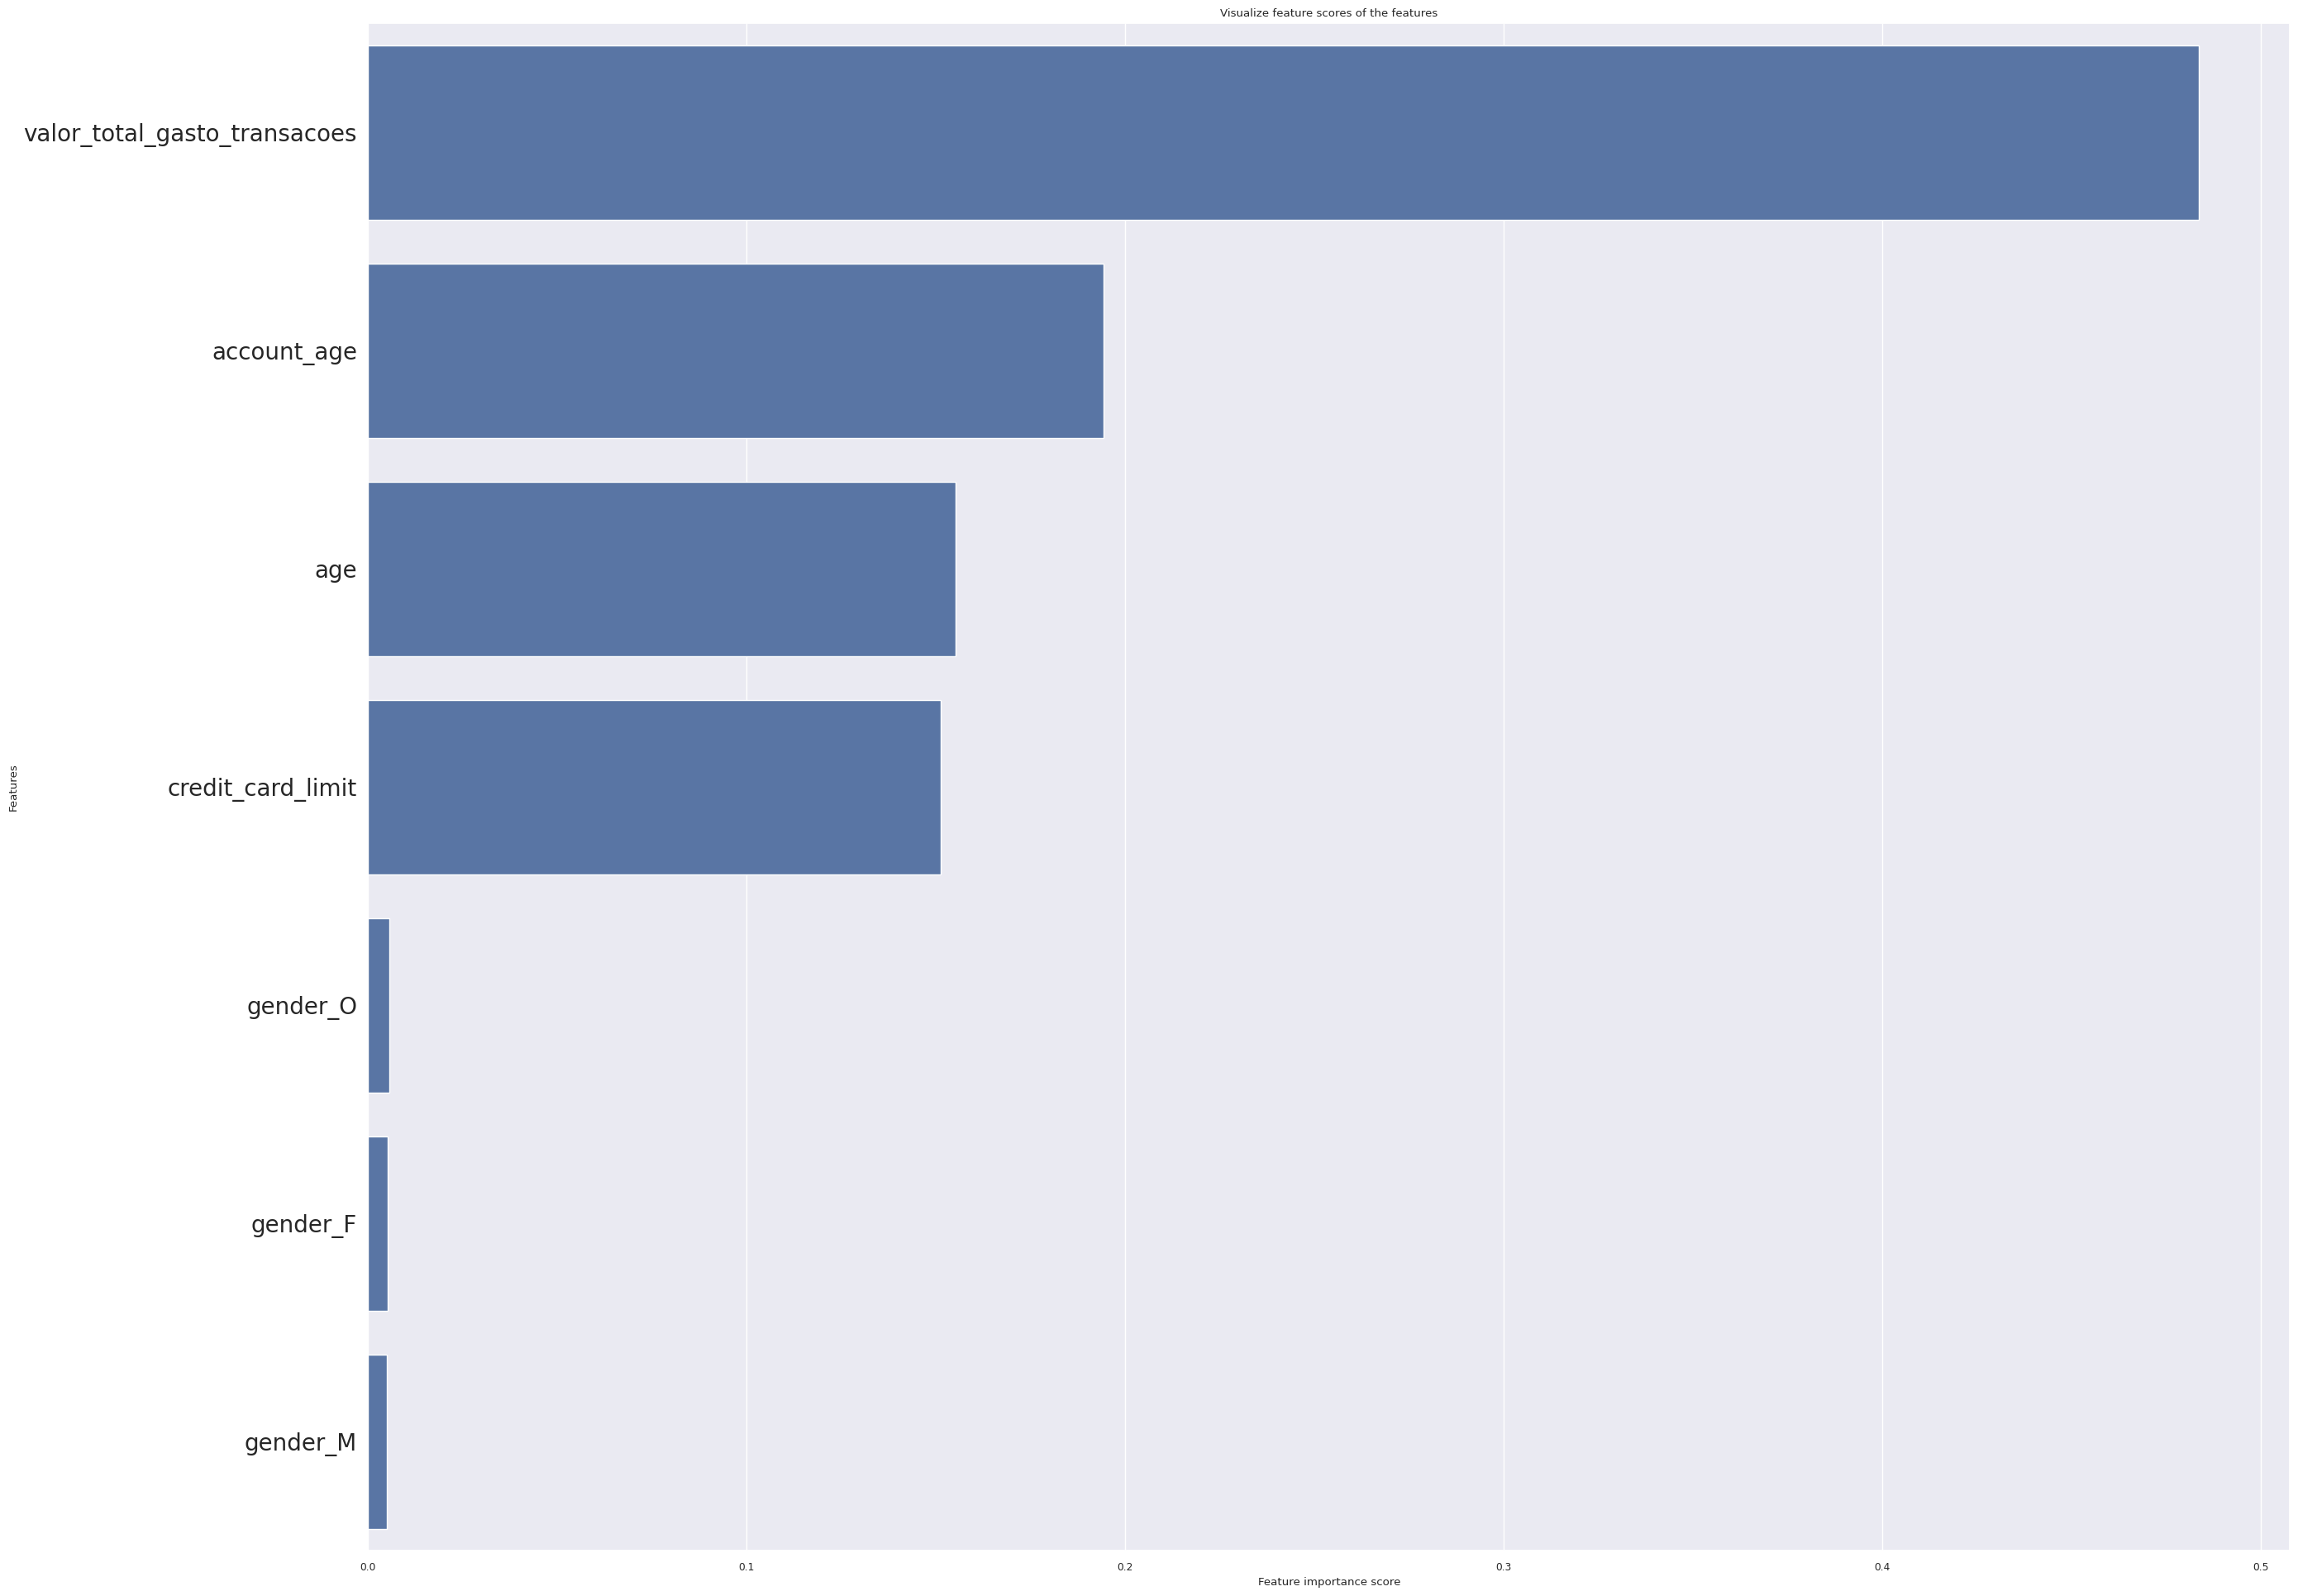

In [60]:
f, ax = plt.subplots(figsize=(30, 24))
ax = sns.barplot(x=feature_scores, y=feature_scores.index)
ax.set_title("Visualize feature scores of the features")
ax.set_yticklabels(feature_scores.index, fontsize=20)
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
plt.show()

In [61]:
new_features = feature_scores [feature_scores>0.0005]
new_features = new_features.reset_index()
new_features.columns = ['Variaveis','Importancia']
variaveis_selecionadas = new_features['Variaveis']

In [62]:
new_features

,Variaveis,Importancia
0,valor_total_gasto_transacoes,0.483520
1,account_age,0.194256
2,age,0.155158
3,credit_card_limit,0.151290
4,gender_O,0.005685
5,gender_F,0.005154
6,gender_M,0.004937


In [63]:
X_select = X[variaveis_selecionadas]

## 2. Separação Conjunto de dados

In [64]:
# Separando o conjunto de dados em treino e teste
# Sendo 70% para treino e 30% para teste
X_train, X_test, y_train, y_test = train_test_split(
    X_select,y,test_size = 0.3, random_state = 42, shuffle = True
)

In [65]:
# Verificando a distribuição das classes nos dois conjuntos
y_test.value_counts(normalize = True)*100

,proportion
target,
0,68.774832
1,31.225168


In [66]:
y_train.value_counts(normalize = True)*100

,proportion
target,
0,68.495929
1,31.504071


## 3. Modelos

## Escolha de Hyperparametros

### Modelo 1: Regressão Logistica

In [67]:
# # Modelo 1 : Regressão Logistica
# model_lr = LogisticRegression(class_weight = 'balanced', max_iter=1000)
#
# param_dict_lr = {
#     'solver':['newton-cg', 'lbfgs', 'liblinear'],
#     'penalty': [ 'l1', 'l2'],
#     'C': [0.001, 0.01, 0.1, 1, 10]
# }
#
# # Busca com validação cruzada
# grid_lr = GridSearchCV(model_lr, param_dict_lr, cv=5, scoring='roc_auc')
# grid_lr.fit(X_train, y_train)
#
# # Melhor combinação
# print("Melhores parâmetros:", grid_lr.best_params_)
# print("Melhor AUC:", grid_lr.best_score_)

In [68]:
#print('Parametros:', grid_lr.best_params_)
#print('Modelo:', grid_lr.best_estimator_)
#print('Score:', grid_lr.best_score_)

Parametros: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
Modelo: LogisticRegression(C=10, class_weight='balanced', max_iter=1000, penalty='l1',
                   solver='liblinear')
Score: 0.646798853216162

In [69]:
model_lr = LogisticRegression(class_weight = 'balanced', C=10,penalty = 'l1', solver='liblinear')

### Modelo 2: Arvore de Decisão

In [70]:
# Modelo 2 : Arvore de Decisão
# model_dt = DecisionTreeClassifier(class_weight = 'balanced', random_state=42)
# param_dict_dt = {
#     'criterion':['gini','entropy'],
#     'max_depth': [3, 5, 10, 20, None],
#     'min_samples_split':  [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4]
# }
# grid_dt = GridSearchCV(model_dt, param_grid = param_dict_dt, cv = 10, verbose = 1, n_jobs = 1)
# grid_dt.fit(X_train, y_train)

In [41]:
#print('Parametros:', grid_dt.best_params_)
#print('Modelo:', grid_dt.best_estimator_)
#print('Score:', grid_dt.best_score_)

Parametros: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Modelo: DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=3, random_state=42)
Score: 0.5707916737966607


Parametros: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Modelo: DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=3, random_state=42)
Score: 0.5707916737966607

In [71]:
model_dt = DecisionTreeClassifier(class_weight = 'balanced', criterion = 'entropy',
                                  max_depth= 3)

### Modelo 3: Random Forest

In [72]:
# # Modelo 3 : Random Forest
#  model_rf = RandomForestClassifier(class_weight = 'balanced', random_state=42, n_jobs=-1)
#
#  param_dict_rf = {
#     'n_estimators': [100, 200],
#     'max_depth': [5, 10, None],
#     'min_samples_split': [2, 5],
#     'min_samples_leaf': [1, 2],
#     'max_features': ['sqrt', 'log2']
#  }
#
#  grid_rf = GridSearchCV(model_rf, param_grid = param_dict_rf, cv = 10, verbose = 1, n_jobs = 1)
#
#  grid_rf.fit(X_train, y_train)

In [73]:
#print('Parametros:', grid_rf.best_params_)
#print('Modelo:', grid_rf.best_estimator_)
#print('Score:', grid_rf.best_score_)

Parametros: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Modelo: RandomForestClassifier(class_weight='balanced', max_depth=10,
                       min_samples_leaf=2, n_estimators=200, n_jobs=-1,
                       random_state=42)
Score: 0.5586552303958716

In [74]:
model_rf = RandomForestClassifier(class_weight = 'balanced', criterion = 'entropy',
                                 max_depth= 10, max_features= 'sqrt', n_estimators = 200, random_state=42)

## Treino Modelo

In [75]:
def exe_modelo (model, X, y,name_model, X_test, y_test):
  resultados= pd.DataFrame()
  score_f1_train = []
  score_auc_train  = []

  score_f1_valid = []
  score_auc_valid  = []
  # Uso de validação cruzada para garantir estabilidade e generalização dos resultados
  skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)

  for train_index, valid_index in skf.split(X, y):
    X_train, X_valid = X.iloc[train_index,:], X.iloc[valid_index, :]
    y_train, y_valid = y.iloc[train_index], y.iloc[valid_index]

    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_valid_pred = model.predict(X_valid)

    auc_train = metrics.roc_auc_score(y_train,y_train_pred)
    score_auc_train.append(auc_train)

    auc_valid = metrics.roc_auc_score(y_valid, y_valid_pred)
    score_auc_valid.append(auc_valid)


    f1_train = metrics.f1_score(y_train,y_train_pred)
    score_f1_train.append(f1_train)

    f1_valid = metrics.f1_score(y_valid, y_valid_pred)
    score_f1_valid.append(f1_valid)


  y_test_pred = model.predict(X_test)
  auc_test = metrics.roc_auc_score(y_test,y_test_pred)
  f1_test = metrics.f1_score(y_test,y_test_pred)


  resultados.at[0,0] = name_model
  resultados.at[0,1] = np.average(score_auc_train)
  resultados.at[0,2] = np.average(score_auc_valid)
  resultados.at[0,3] = auc_test
  resultados.at[0,4] = np.average(score_f1_train)
  resultados.at[0,5] = np.average(score_f1_valid)
  resultados.at[0,6] = f1_test
  resultados.columns = ['Modelo','Train AUC','Valid AUC', 'Test AUC', 'Train F1', 'Valid F1', 'Test F1']

  return resultados


## Avaliação

In [76]:
 # Regressão Logistica
resultado_regr_log = exe_modelo (model_lr, X_train, y_train,'Regressão Logística', X_test, y_test)

 # Arvore de Decisão
resultado_arv = exe_modelo (model_dt, X_train, y_train,'Arvore de Decisão',X_test, y_test)

 # Random Forest
resultado_Random = exe_modelo (model_rf, X_train, y_train,'Random Forest', X_test, y_test)

pd.concat([resultado_regr_log, resultado_arv,resultado_Random])

,Modelo,Train AUC,Valid AUC,Test AUC,Train F1,Valid F1,Test F1
0,Regressão Logística,0.607168,0.607078,0.606927,0.498342,0.498264,0.495786
0,Arvore de Decisão,0.635398,0.633596,0.631455,0.542930,0.541354,0.534910
0,Random Forest,0.646099,0.624680,0.621096,0.553442,0.533734,0.527226


In [78]:
def print_matrix (model, X,y):
  #definindo o tamanho das figuras
  %matplotlib inline
  plt.figure(figsize = ((10, 4)))

  # Gráfico 1 - Matriz de Confusão
  plt.subplot(1, 2, 1)
  plt.title("Matriz de Confusão", fontsize = 16)
  cm = confusion_matrix(y, model.predict(X))
  sns.set(font_scale=0.8)
  ax = sns.heatmap(cm,annot=True,fmt='g',annot_kws={'size':12} ,square=True,cmap='Reds')
  ax.set_ylabel('Respostas Reais', fontsize=10)
  ax.set_xlabel('Respostas Previstos', fontsize=10)

  plt.subplot(1, 2, 2)
  plt.title("Curva ROC - AUC", fontsize = 16)
  y_pred = model.predict(X)
  fpr, tpr, _ = metrics.roc_curve(y,  y_pred)
  auc = metrics.roc_auc_score(y, y_pred)
  plt.plot(fpr,tpr,label="auc="+str(auc))
  plt.legend(loc=4)


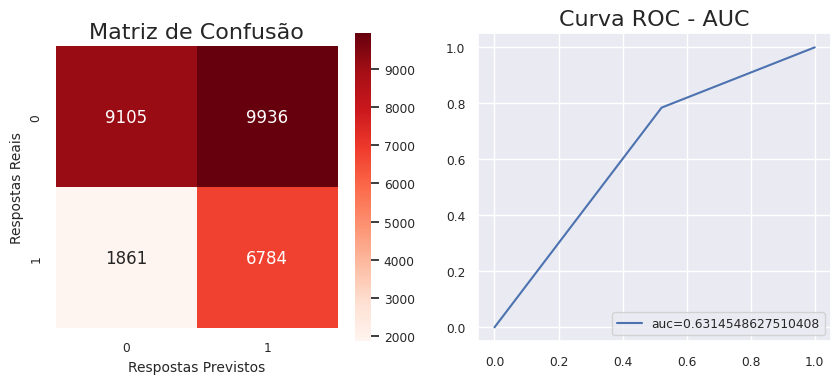

In [79]:
print_matrix (model_dt, X_test, y_test)

## Gerar Ranking

In [87]:
y_valid_pred = pd.DataFrame(model_dt.predict_proba(X_test))

In [89]:
resultado = X_test.reset_index()
resultado = resultado[['account_id','offer_id_pk']]
y_result = y_test.reset_index()
resultado['target'] = y_result['target']
resultado['predict'] = y_valid_pred[1]
resultado

,account_id,offer_id_pk,target,predict
0,b657f02caf074ff7a3b9b8b1e0f585be,2298d6c36e964ae4a3e7e9706d1fb8c2,0,0.005295
1,b519d8d3bc1c429b80147a10d8767e4c,9b98b8c7a33c4b65b9aebfe6a799e6d9,0,0.622541
2,7778fe787e7240cd8684ca67ca72eeba,9b98b8c7a33c4b65b9aebfe6a799e6d9,0,0.005295
3,b1552ad9c27d49d49e8a30eaf6cb79b0,f19421c1d4aa40978ebb69ca19b0e20d,0,0.399004
4,1ea1a86f17234a249151ea3785925c4c,ae264e3637204a6fb9bb56bc8210ddfd,0,0.622541
...,...,...,...,...
27681,cd8528f0605e4353831185492f547598,5a8bc65990b245e5a138643cd4eb9837,0,0.622541
27682,03e866224ec641c58bc93a69be00de9c,fafdcd668e3743c1bb461111dcafc2a4,0,0.399004
27683,17b2c631360648afa044912d9959615f,9b98b8c7a33c4b65b9aebfe6a799e6d9,1,0.622541
27684,ff5a3d93c39e40d0a56a65673350cfab,2298d6c36e964ae4a3e7e9706d1fb8c2,0,0.005295


In [90]:
resultado['ranking'] = resultado.groupby('account_id')['predict'] \
                                       .rank(method='first', ascending=False).astype(int)

In [94]:
resultado = resultado[resultado['ranking']==1]

In [95]:
resultado

,account_id,offer_id_pk,target,predict,ranking
0,b657f02caf074ff7a3b9b8b1e0f585be,2298d6c36e964ae4a3e7e9706d1fb8c2,0,0.005295,1
1,b519d8d3bc1c429b80147a10d8767e4c,9b98b8c7a33c4b65b9aebfe6a799e6d9,0,0.622541,1
2,7778fe787e7240cd8684ca67ca72eeba,9b98b8c7a33c4b65b9aebfe6a799e6d9,0,0.005295,1
3,b1552ad9c27d49d49e8a30eaf6cb79b0,f19421c1d4aa40978ebb69ca19b0e20d,0,0.399004,1
4,1ea1a86f17234a249151ea3785925c4c,ae264e3637204a6fb9bb56bc8210ddfd,0,0.622541,1
...,...,...,...,...,...
27642,a51d258ed1294892b4956420b2158925,2906b810c7d4411798c6938adc9daaa5,0,0.285449,1
27643,1aa26e8aea6440de9acb1edd6085ce64,5a8bc65990b245e5a138643cd4eb9837,0,0.160976,1
27645,e88b9aaa938c446289fb909cffeaa255,4d5c57ea9a6940dd891ad53e9dbe8da0,1,0.622541,1
27676,e23d0189d573404e864a10ecd2817520,2298d6c36e964ae4a3e7e9706d1fb8c2,0,0.491962,1
